In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [5]:
flight = pd.read_csv('dataset/flights.csv')
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2



What do coach ticket prices look like? What are the high and low values? What would be considered average?

376.58525308213905
380.56


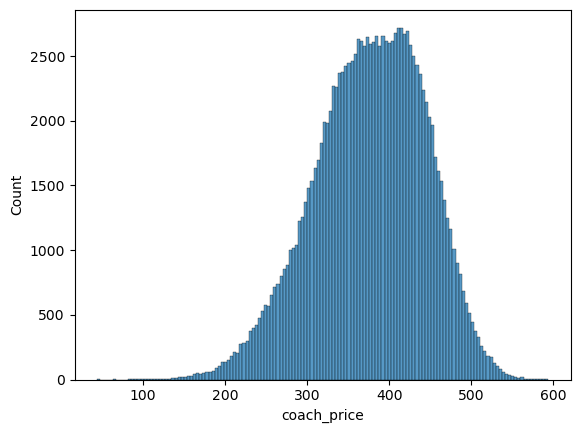

In [9]:
print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))

sns.histplot(flight.coach_price)
plt.show()

What are the high, low, and average prices for 8-hour-long flights?

431.834377372817
437.115


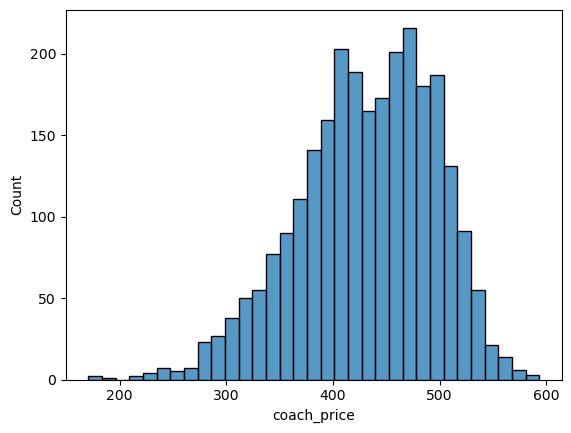

In [8]:
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))

sns.histplot(flight.coach_price[flight.hours == 8])
plt.show()

How are flight delay times distributed?

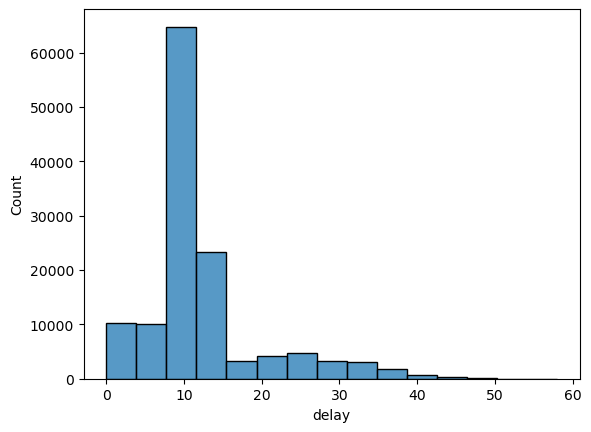

In [16]:
sns.histplot(flight.delay[flight.delay <=500], bins=15)
plt.show()

What is the relationship between coach and first-class prices? Do flights with higher coach prices always have higher first-class prices as well?

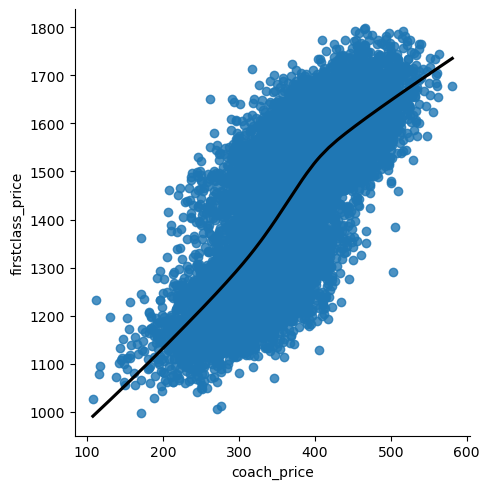

In [17]:
perc = 0.1
flight_sub = flight.sample(n=int(flight.shape[0]*perc))
 
sns.lmplot(x="coach_price", y="firstclass_price", data=flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()


What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi?

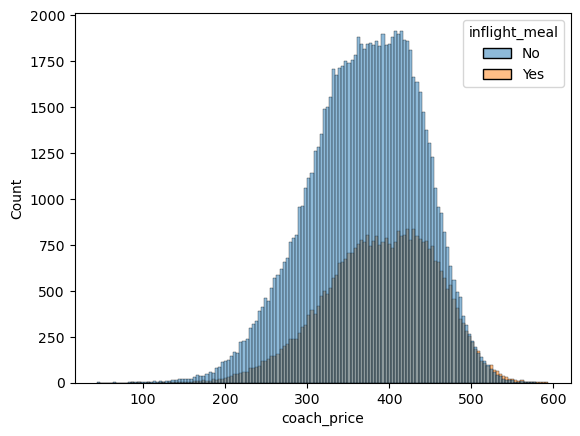

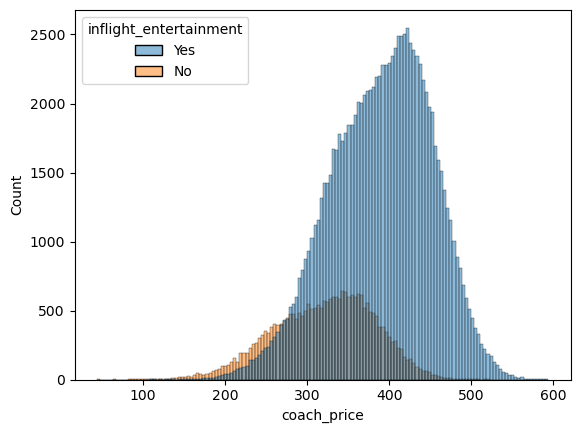

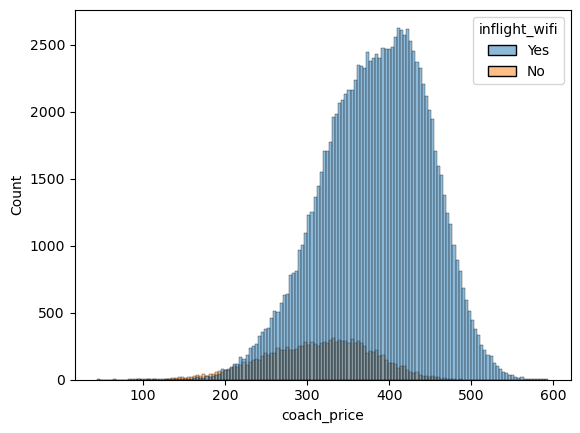

In [20]:
# Inflight Meals
sns.histplot(flight, x="coach_price", hue=flight.inflight_meal)
plt.show()
 
# Inflight Entertainment
sns.histplot(flight, x="coach_price", hue=flight.inflight_entertainment)
plt.show()
 
# Inflight WiFi
sns.histplot(flight, x="coach_price", hue=flight.inflight_wifi)
plt.show()


How does the number of passengers change in relation to the length of flights?

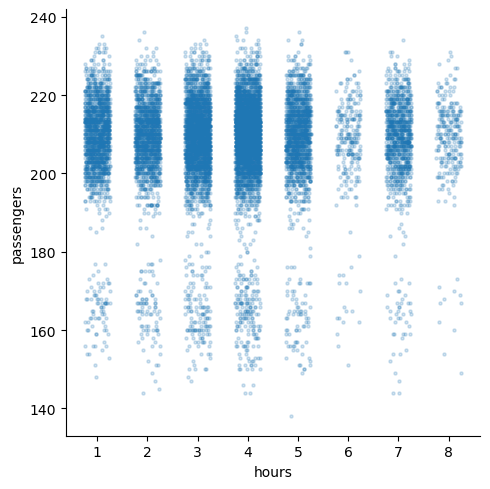

In [21]:
sns.lmplot(x="hours", y="passengers", data=flight_sub, x_jitter=0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg=False)
plt.show()


Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

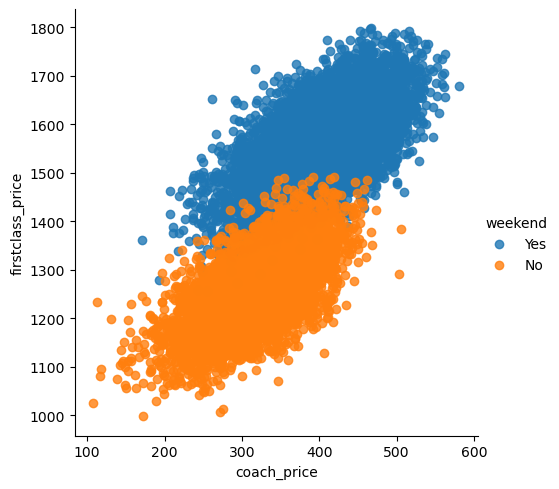

In [23]:
sns.lmplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight_sub, fit_reg= False)
plt.show()

How do coach prices differ for redeyes and non-redeyes on each day of the week?

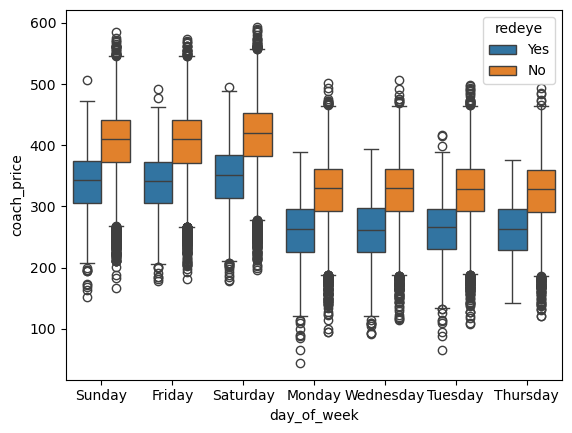

In [24]:
sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight)
plt.show()